# I. DATA GATHERING

In [1]:
import tweepy
import time
import pandas as pd
import json
import csv
import preprocessor as p
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
consumer_key='REaMi8xx8RdhbBkww1FZN3MYZ'
consumer_secret='i6RlP0dtciQJZyDCr4QQZLN9ZcBuGO3dk8ydt6OFFNHZTXG2M5'
access_token='1260634140006854663-mnxpy7W2CqjxJ4voj9UPWA9wRv5zpS'
access_token_secret='gmOqBoEayxp6tT0NU7UfH6TU0Y60d9tbYBszZQhYuZ7mT'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

# Keyword "Vegan"

In [12]:
txts = []

for tweet in tweepy.Cursor(api.search,
            q='vegan -filter:retweets',
            lang="en").items(5000):
    txts.append(json.loads(json.dumps(tweet._json)))
    
len(txts)

Rate limit reached. Sleeping for: 814
Rate limit reached. Sleeping for: 820


5000

In [6]:

txts[0]

{'created_at': 'Wed Nov 04 01:49:50 +0000 2020',
 'id': 1323804616962711552,
 'id_str': '1323804616962711552',
 'text': 'Cider, vegan ice cream and grocery store Jojos were my purchase just now. The jojos didn’t make it out of the parki… https://t.co/1yXEanaRk6',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/1yXEanaRk6',
    'expanded_url': 'https://twitter.com/i/web/status/1323804616962711552',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 249815381,
  'id_str': '249815381',
  'name': 'AshleyHartmeierPrigg',
  'screen_name': 'ashleyhart

In [17]:
time = []
twtid = []
text = []
favorite_count = []
retweet_count=[]
hashtags=[]
favorite_count=[]
screen_name=[]

for line in txts:
    time.append(line['created_at'])
    twtid.append(line['id'])
    screen_name.append(line['user']['screen_name'])
    text.append(line['text'])
    favorite_count.append(line['favorite_count'])
    retweet_count.append(line['retweet_count'])
    hashtags.append(line['entities']['hashtags'])

In [18]:

p.clean(text[1])
text_clean = []
for line in text:
    text_clean.append(p.clean(line))
text_clean[:1]
# create data frame
df1 = pd.DataFrame(list(zip(time, twtid, screen_name, text_clean, favorite_count, retweet_count, hashtags)),
                             columns=['created_at', 'tweet_id','screen_name','text','favorite_count','retweet_count',
                                     'hashtags'])
df1

,created_at,tweet_id,screen_name,text,favorite_count,retweet_count,hashtags
0,Wed Nov 04 02:36:17 +0000 2020,1323816306831958022,RebeccaTKaplan,"sour cream and onion. they're not vegan, don't...",0,0,[]
1,Wed Nov 04 02:36:13 +0000 2020,1323816288850829314,JMcFly_14,"You dont even eat that, you vegan",0,0,[]
2,Wed Nov 04 02:36:11 +0000 2020,1323816282630901761,dallasUPnorth,stress bought cheesecloth and citric acidready...,0,0,[]
3,Wed Nov 04 02:36:10 +0000 2020,1323816276536512512,unhinderedlass,i ate $40 worth of vegan tacos from and made a...,0,0,[]
4,Wed Nov 04 02:36:00 +0000 2020,1323816233435910144,CameraOnAmazon,"A vegan, a non voter, and a biracial wall into...",0,0,[]
...,...,...,...,...,...,...,...
4995,Tue Nov 03 18:15:35 +0000 2020,1323690302410944512,OLismyjam,"Just basic brownies, except vegan (coconut oil...",0,0,[]
4996,Tue Nov 03 18:15:33 +0000 2020,1323690292227104769,angelina_gault,been vegan for years and it makes me feel safe...,3,0,[]
4997,Tue Nov 03 18:15:32 +0000 2020,1323690286976016397,TayBryant_,reducing the menu size does not mean taking ve...,1,0,[]
4998,Tue Nov 03 18:15:20 +0000 2020,1323690240243019779,TribalistSF,"By combining top travel lists, we've created a...",0,0,[]


# Hashtag #Vegan

In [19]:
txt2 = []

for tweet in tweepy.Cursor(api.search,
            q='#vegan -filter:retweets',
            lang="en").items(5000):
    txt2.append(json.loads(json.dumps(tweet._json)))
    
len(txt2)

Rate limit reached. Sleeping for: 595
Rate limit reached. Sleeping for: 815


5000

In [20]:
txt2[0]

{'created_at': 'Wed Nov 04 03:09:13 +0000 2020',
 'id': 1323824594764128256,
 'id_str': '1323824594764128256',
 'text': '#earn #earnmoney #affiliatelink #affiliateprogram Daily Habit is compatible with the healthiest #diets, including… https://t.co/HsVWDEBhyL',
 'truncated': True,
 'entities': {'hashtags': [{'text': 'earn', 'indices': [0, 5]},
   {'text': 'earnmoney', 'indices': [6, 16]},
   {'text': 'affiliatelink', 'indices': [17, 31]},
   {'text': 'affiliateprogram', 'indices': [32, 49]},
   {'text': 'diets', 'indices': [96, 102]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/HsVWDEBhyL',
    'expanded_url': 'https://twitter.com/i/web/status/1323824594764128256',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [115, 138]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="https://contentstudio.io" rel="nofollow">ContentStudio.io</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': No

In [21]:
time = []
twtid = []
text = []
favorite_count = []
retweet_count=[]
hashtags=[]
favorite_count=[]
screen_name=[]

for line in txt2:
    time.append(line['created_at'])
    twtid.append(line['id'])
    screen_name.append(line['user']['screen_name'])
    text.append(line['text'])
    favorite_count.append(line['favorite_count'])
    retweet_count.append(line['retweet_count'])
    hashtags.append(line['entities']['hashtags'])

In [22]:
p.clean(text[1])
text_clean = []
for line in text:
    text_clean.append(p.clean(line))
text_clean[:1]
# create data frame
df2 = pd.DataFrame(list(zip(time, twtid, screen_name, text_clean, favorite_count, retweet_count, hashtags)),
                             columns=['created_at', 'tweet_id','screen_name','text','favorite_count','retweet_count',
                                     'hashtags'])
df2

,created_at,tweet_id,screen_name,text,favorite_count,retweet_count,hashtags
0,Wed Nov 04 03:09:13 +0000 2020,1323824594764128256,bmurphypointman,Daily Habit is compatible with the healthiest ...,0,0,"[{'text': 'earn', 'indices': [0, 5]}, {'text':..."
1,Wed Nov 04 03:06:04 +0000 2020,1323823800954204160,GreenerLiv,To encourage brands to stop using and testing ...,0,0,[]
2,Wed Nov 04 03:00:09 +0000 2020,1323822314392293376,GoUltima,Ultima Stick packs: On-the-go fall essentials ...,0,0,"[{'text': 'Goultima', 'indices': [59, 68]}, {'..."
3,Wed Nov 04 02:58:49 +0000 2020,1323821979410042883,thecookspyjamas,"Ready in just minutes, this &amp; white makes ...",1,0,"[{'text': 'tomato', 'indices': [31, 38]}, {'te..."
4,Wed Nov 04 02:56:43 +0000 2020,1323821450848075777,Thriftylesley,Wine being the obviously most expensive ingred...,0,0,[]
...,...,...,...,...,...,...,...
4995,Sun Nov 01 11:47:36 +0000 2020,1322867887783239684,riojuice1,Let us deliver a juice detox right to your doo...,1,1,"[{'text': 'detox', 'indices': [84, 90]}, {'tex..."
4996,Sun Nov 01 11:47:29 +0000 2020,1322867856036499457,WestBeachBandK,Its World Vegan Day Our sea view restaurants V...,2,1,[]
4997,Sun Nov 01 11:47:12 +0000 2020,1322867783764451329,ChicagoPlantEat,Instead of thinking about what NOT to eat...fo...,6,4,[]
4998,Sun Nov 01 11:47:08 +0000 2020,1322867768040017921,Alexandercas41,"It has been, and for a long time. Heart diseas...",1,0,[]


# Combine 2 datatsets together

In [23]:
new_df = df1.append(df2)

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 4999
Data columns (total 7 columns):
created_at        10000 non-null object
tweet_id          10000 non-null int64
screen_name       10000 non-null object
text              10000 non-null object
favorite_count    10000 non-null int64
retweet_count     10000 non-null int64
hashtags          10000 non-null object
dtypes: int64(3), object(4)
memory usage: 625.0+ KB


In [26]:
new_df.head()

,created_at,tweet_id,screen_name,text,favorite_count,retweet_count,hashtags
0,Wed Nov 04 02:36:17 +0000 2020,1323816306831958022,RebeccaTKaplan,"sour cream and onion. they're not vegan, don't...",0,0,[]
1,Wed Nov 04 02:36:13 +0000 2020,1323816288850829314,JMcFly_14,"You dont even eat that, you vegan",0,0,[]
2,Wed Nov 04 02:36:11 +0000 2020,1323816282630901761,dallasUPnorth,stress bought cheesecloth and citric acidready...,0,0,[]
3,Wed Nov 04 02:36:10 +0000 2020,1323816276536512512,unhinderedlass,i ate $40 worth of vegan tacos from and made a...,0,0,[]
4,Wed Nov 04 02:36:00 +0000 2020,1323816233435910144,CameraOnAmazon,"A vegan, a non voter, and a biracial wall into...",0,0,[]


# II. DATA CLEANING

In [2]:
new_df.to_csv('Vegan_tweets.csv', encoding='utf-8', index=False)

NameError: name 'new_df' is not defined

In [36]:
vegan_df = pd.read_csv('Vegan_tweets.csv')

In [37]:
vegan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
created_at        10000 non-null object
tweet_id          10000 non-null int64
screen_name       10000 non-null object
text              9908 non-null object
favorite_count    10000 non-null int64
retweet_count     10000 non-null int64
hashtags          10000 non-null object
dtypes: int64(3), object(4)
memory usage: 547.0+ KB


In [38]:
sum(vegan_df.duplicated())

507

In [39]:
#remove duplicates
vegan_df.drop_duplicates(inplace=True)

In [40]:
vegan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9493 entries, 0 to 9999
Data columns (total 7 columns):
created_at        9493 non-null object
tweet_id          9493 non-null int64
screen_name       9493 non-null object
text              9405 non-null object
favorite_count    9493 non-null int64
retweet_count     9493 non-null int64
hashtags          9493 non-null object
dtypes: int64(3), object(4)
memory usage: 593.3+ KB


In [41]:
tweet_df = vegan_df[['text']]

In [42]:
tweet_df.shape

(9493, 1)

In [43]:
tweet_df.head()

,text
0,"sour cream and onion. they're not vegan, don't..."
1,"You dont even eat that, you vegan"
2,stress bought cheesecloth and citric acidready...
3,i ate $40 worth of vegan tacos from and made a...
4,"A vegan, a non voter, and a biracial wall into..."


In [15]:
# apply the first round of text cleaning techniques
import re
import string

def clean_text(text):
    # Remove all the special characters
    text = re.sub(r'\W', ' ', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # remove triple dots
    text = re.sub("\.\.\.", "", text)
    
    # strip punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Remove leading and trailing whitespaces
    text = re.sub(r'^\s+|\s+$', '', text)
    
    # Remove numbers
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)

    # Converting to Lowercase
    text = text.lower()
    
    return text

round1 = lambda x: clean_text(x) 

tweet_df.text = tweet_df.text.astype(str)
# take a look at the updated text
tweets = pd.DataFrame(tweet_df['text'].apply(round1))
tweets

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,text
0,sour cream and onion they re not vegan don tel...
1,you dont even eat that you vegan
2,stress bought cheesecloth and citric acidready...
3,i ate worth of vegan tacos from and made an en...
4,a vegan non voter and biracial wall into bar
...,...
9995,let us deliver juice detox right to your door ...
9996,its world vegan day our sea view restaurants v...
9997,instead of thinking about what not to eat focu...
9998,it has been and for long time heart disease an...


In [16]:
# removing empty strings
nan_value = float("NaN")

#Convert NaN values to empty string
tweets.replace("", nan_value, inplace=True)
tweets.dropna(subset = ["text"], inplace=True)
tweets = tweets.sort_index(ascending=False)
tweets.head()

,text
9999,diwali glow edit out now all your fav brands i...
9998,it has been and for long time heart disease an...
9997,instead of thinking about what not to eat focu...
9996,its world vegan day our sea view restaurants v...
9995,let us deliver juice detox right to your door ...


In [17]:
tweets.shape

(9492, 1)

In [32]:
tweets.to_csv('vegan-tweets.csv', encoding='utf-8', index=False)

In [3]:
new_df = pd.read_csv('vegan-tweets.csv')

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 1 columns):
text    9404 non-null object
dtypes: object(1)
memory usage: 74.3+ KB


# III. TEXT ANALYSIS

In [48]:
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
from sklearn.manifold import TSNE

In [8]:
nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))

def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = new_df["text"].size   #df
clean_Tweet_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_Tweet_lemmization.append(fix_Text2(new_df["text"][i])) #clean_

clean_Tweet_lemmization[0:5]    ## clean_

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['diwali glow edit fav brand one box november belle boxjust inrorder',
 'long time heart disease obesity related effect leadin',
 'instead thinking eat focus exploring wonderful thing eat great healt',
 'world vegan day sea view restaurant vegan special next day mouth wateringly good v',
 'let u deliver juice detox right door via deliveroo eat apps']

In [36]:
len(clean_Tweet_lemmization)

9492

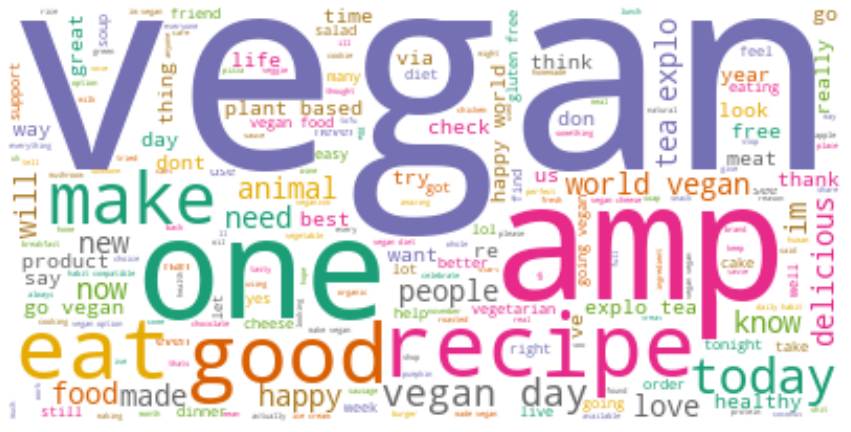

In [37]:
from wordcloud import WordCloud 

# word cloud visualization
allSentences = ' '.join([tweets for tweets in tweets['text']])
wordCloud = WordCloud(background_color='white', colormap='Dark2', max_font_size=150, random_state=1).generate(allSentences)
plt.figure(figsize = (15, 20))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
tweets['Subjectivity'] = tweets['text'].apply(getSubjectivity)
tweets['Polarity'] = tweets['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
tweets

,text,Subjectivity,Polarity
9999,diwali glow edit out now all your fav brands i...,0.000000,0.000000
9998,it has been and for long time heart disease an...,0.400000,-0.025000
9997,instead of thinking about what not to eat focu...,0.875000,0.900000
9996,its world vegan day our sea view restaurants v...,0.317857,0.214286
9995,let us deliver juice detox right to your door ...,0.535714,0.285714
...,...,...,...
4,a vegan non voter and biracial wall into bar,0.000000,0.000000
3,i ate worth of vegan tacos from and made an en...,0.362500,0.150000
2,stress bought cheesecloth and citric acidready...,0.000000,0.000000
1,you dont even eat that you vegan,0.000000,0.000000


In [39]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweets['Analysis'] = tweets.Polarity.apply(getAnalysis)

tweets

,text,Subjectivity,Polarity,Analysis
9999,diwali glow edit out now all your fav brands i...,0.000000,0.000000,Neutral
9998,it has been and for long time heart disease an...,0.400000,-0.025000,Negative
9997,instead of thinking about what not to eat focu...,0.875000,0.900000,Positive
9996,its world vegan day our sea view restaurants v...,0.317857,0.214286,Positive
9995,let us deliver juice detox right to your door ...,0.535714,0.285714,Positive
...,...,...,...,...
4,a vegan non voter and biracial wall into bar,0.000000,0.000000,Neutral
3,i ate worth of vegan tacos from and made an en...,0.362500,0.150000,Positive
2,stress bought cheesecloth and citric acidready...,0.000000,0.000000,Neutral
1,you dont even eat that you vegan,0.000000,0.000000,Neutral


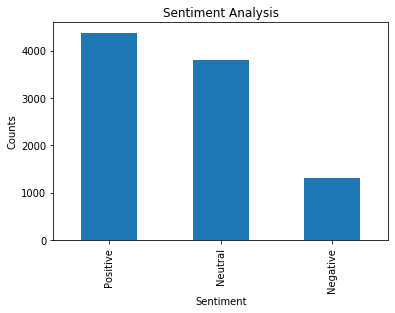

In [40]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [41]:
# print all positive tweets
print('Positive tweets:\n')
j=1
sortedDf = tweets.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
    if(sortedDf['Analysis'][i] == 'Positive'):
        print(str(j) + '. ' + sortedDf['text'][i])
        print()
        j+=1

Positive tweets:

1. i ate worth of vegan tacos from and made an entire plate of brownies am truly coping

2. good name for vegan quesadilla food truck

3. find out your skin type and personalize attributes eg vegan pregnancy safe to discover truly compatible skin ca

4. what do you think so far im at work and cant watch the election

5. most men can be converted to vegan by the right woman

6. stress eating brownies here does vegan gluten free count didnt have any of the hard stuff the on

7. they will say suburban blonde brunette freckled vegan pescatarian peloton loving before they call white women white

8. vegan butter is better than regular butter

9. if he is true vegan he should be anti horse racing

10. any good vegan lemon square recipes out there lmk m trying to impress someone

11. so trumps effectively won it already hope all the left wing hipster tree hugging vegan greta thunberg loving p

12. come on vegan we don need that wait you definitely don look like too many vegan

KeyError: 4791

In [42]:
# print all positive tweets
print('Negative tweets:\n')
j=1
sortedDf = tweets.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
    if(sortedDf['Analysis'][i] == 'Negative'):
        print(str(j) + '. ' + sortedDf['text'][i])
        print()
        j+=1

Negative tweets:

1. sour cream and onion they re not vegan don tell the mayonnaise companies

2. i wish it was more vegan spots in philly im sick of the same shit

3. i just had some nachos and red wine in few hours m about to eat this vegan pizza chips salsa and another

4. get you boy who helps pay for vegan pizza when youre sad and drunk

5. i keep on saying im gonna go vegan but here am dogging some chicken from noches

6. check out what just added to my closet on poshmark euc koltov black vegan leather handbag

7. craving for spices making vegan taquitos black beans and spanish rice with avocado and salsa

8. i am not interested in biden harris presidence choose to accept the mark forever as far as am con

9. kids are healthiest less disruptive sleep betterstop putting animal pro

10. yeap he spoke on it few times there are players on tennessee titans that are vegan too

11. sorry no stream today got home later than thought and went to go vote with my mom ate big bowl of vegan r


KeyError: 4791

In [9]:
tv=TfidfVectorizer() 
tv_transform=tv.fit_transform(clean_Tweet_lemmization)
tv_transform.shape

(9492, 10712)

In [18]:
tv=TfidfVectorizer(max_features=100, min_df=3) # 1.change # of features 2.maybe min_df
tv_transform=tv.fit_transform(clean_Tweet_lemmization)

In [19]:
columns=tv.get_feature_names() # feature names
#transform to DF
df_tweet=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
tv_sum=df_tweet.sum() #df
tv_sum.columns = ['importance']

In [46]:
tv_sum.sort_values(ascending=False).head(20)

vegan     1751.469272
amp        316.038543
day        286.485637
food       251.842820
happy      222.438012
like       222.268125
go         214.581788
make       212.003155
one        206.486565
world      206.332867
get        194.146870
im         193.177810
good       186.440371
made       181.010646
tea        179.900505
recipe     179.498584
today      172.676499
free       165.585135
eat        165.462449
new        164.978829
dtype: float64

In [47]:
df_sum=pd.DataFrame(tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[0:14]

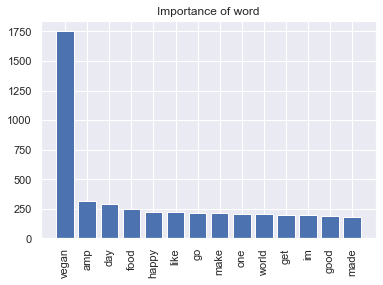

In [50]:
sns.set()
fig,ax=plt.subplots()
ax.bar(df_sum.index,df_sum.importance,label='importance')
ax.set_xticklabels(df_sum.index,rotation=90)
plt.title('Importance of word')
plt.show()

# Binigram

In [15]:
bi_tv=TfidfVectorizer(max_features=100,ngram_range=(2,2)) 
tv_transform=bi_tv.fit_transform(clean_Tweet_lemmization)

In [16]:
columns=bi_tv.get_feature_names() # feature names
#transform to DF
Tweet=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
binigram_tv_sum=Tweet.sum() #df

In [53]:
binigram_tv_sum.sort_values(ascending=False).head(15)

tea explo       222.000000
vegan day       151.289528
world vegan     141.396910
plant based     136.266134
go vegan        134.369690
vegan food       96.625857
happy world      86.729554
going vegan      81.889225
vegan cheese     74.181029
gluten free      67.850568
im vegan         65.411817
make vegan       56.139545
made vegan       49.010476
vegan diet       46.407980
vegan option     46.246328
dtype: float64

In [54]:
bigram_df=pd.DataFrame(binigram_tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[0:14]

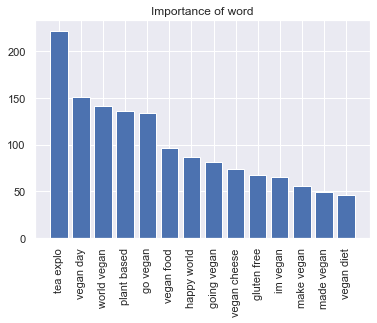

In [55]:
sns.set()
fig,ax=plt.subplots()
ax.bar(bigram_df.index,bigram_df.importance,label='importance')
ax.set_xticklabels(bigram_df.index,rotation=90)
plt.title('Importance of word')
plt.show()

# Text Clustering

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

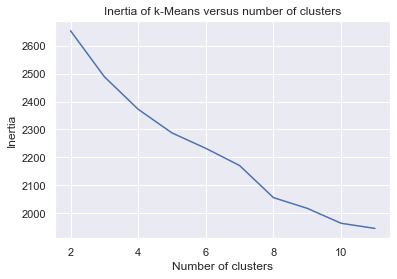

In [56]:
from sklearn.cluster import KMeans
scores = [KMeans(n_clusters=i+2).fit(tv_transform).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

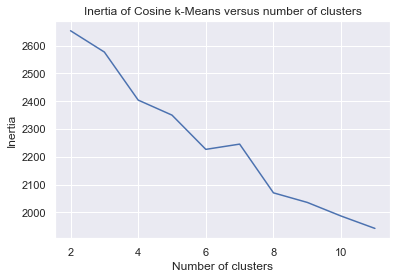

In [57]:
#high dimension data
from sklearn import preprocessing
from sklearn.cluster import KMeans
normalized_vectors = preprocessing.normalize(tv_transform)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)

In [71]:
from sklearn.metrics import silhouette_score
# Prepare models
kmeans = KMeans(n_clusters=4).fit(tv_transform)
normalized_vectors = preprocessing.normalize(tv_transform)
normalized_kmeans = KMeans(n_clusters=4).fit(normalized_vectors)
min_samples = tv_transform.shape[1]+1 

# Print results
print('kmeans: {}'.format(silhouette_score(tv_transform, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))

kmeans: 0.6041079450348402
Cosine kmeans:0.048826467438720066


In [12]:
from scipy.cluster.vq import kmeans,vq

In [13]:
num_clusters=6  # change the # of clusters
cluster_centers,distortion=kmeans(tv_transform.todense(),num_clusters)

In [17]:
terms=bi_tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:5])

['vegan option', 'good vegan', 'vegan vegan', 'sweet potato', 'vegan life']
['plant flap', 'vegan vegan', 'eat vegan', 'vegan chili', 'jack lemon']
['vegan vegan', 'vegan gluten', 'happy vegan', 'vegan version', 'vegan year']
['based diet', 'vegan vegan', 'happy world', 'vegan diet', 'jack lemon']
['vegan vegan', 'happy vegan', 'peanut butter', 'sweet potato', 'jack lemon']
['eating vegan', 'world day', 'vegan vegan', 'make vegan', 'vegan chili']


In [20]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:5])

['tea', 'explo', 'vegan', 'make', 'rice']
['love', 'vegan', 'cream', 'one', 'go']
['vegan', 'product', 'food', 'via', 'want']
['amp', 'vegan', 'free', 'organic', 'go']
['vegan', 'food', 'like', 'make', 'go']
['day', 'world', 'vegan', 'happy', 'one']


# Hashtags

In [99]:
#remove '[]' in hashtags
vegan_df.hashtags = vegan_df.hashtags.replace('[]','')

In [100]:
#convert hashtags into string
vegan_df['hashtags']=vegan_df['hashtags'].apply(str)

In [102]:
# look behind
re.findall(r"(?<='text':\s\')\w+",vegan_df.hashtags[3])

[]

In [103]:
' '.join(re.findall(r"(?<='text':\s\')\w+",vegan_df.hashtags[3]))

''

In [104]:
# apply to every rows
vegan_df.hashtags=vegan_df.hashtags.apply(lambda row: ' '.join(re.findall(r"(?<='text':\s\')\w+",row)))

In [105]:
#check again
vegan_df.hashtags.value_counts()

                                                                                    5640
vegan                                                                                504
tea herbs superfood vegan roots flowers alternativemedicine healing drinks tonic     222
Vegan                                                                                222
WorldVeganDay                                                                         64
                                                                                    ... 
WorldVeganMonth vegan                                                                  1
BringSpringGiveaway                                                                    1
Petition banhunting banfishing BanTrophyHunting Animalrights                           1
TrixieBlues Etsy vegan bio                                                             1
lifestyle Vegan                                                                        1
Name: hashtags, Lengt

# REMOVE HASHTAG VEGAN

In [3]:
newtweet = pd.read_csv('vegan-tweets.csv')

In [4]:
newtweet.head()

,text
0,diwali glow edit out now all your fav brands i...
1,it has been and for long time heart disease an...
2,instead of thinking about what not to eat focu...
3,its world vegan day our sea view restaurants v...
4,let us deliver juice detox right to your door ...


In [5]:
newtweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 1 columns):
text    9404 non-null object
dtypes: object(1)
memory usage: 74.3+ KB


In [13]:
# apply the first round of text cleaning techniques
import re
import string

def clean_text(text):
    # Remove all the special characters
    text = re.sub(r'\W', ' ', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # remove triple dots
    text = re.sub("\.\.\.", "", text)
    
    # strip punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Remove leading and trailing whitespaces
    text = re.sub(r'^\s+|\s+$', '', text)
    
    # Remove numbers
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)

    # Converting to Lowercase
    text = text.lower()
    
    return text

round1 = lambda x: clean_text(x) 

newtweet.text = newtweet.text.astype(str)
# take a look at the updated text
tweet = pd.DataFrame(newtweet['text'].apply(round1))
tweet

,text
0,diwali glow edit out now all your fav brands i...
1,it has been and for long time heart disease an...
2,instead of thinking about what not to eat focu...
3,its world vegan day our sea view restaurants v...
4,let us deliver juice detox right to your door ...
...,...
9487,a vegan non voter and biracial wall into bar
9488,i ate worth of vegan tacos from and made an en...
9489,stress bought cheesecloth and citric acidready...
9490,you dont even eat that you vegan


In [14]:
# removing empty strings
nan_value = float("NaN")

#Convert NaN values to empty string
tweet.replace("", nan_value, inplace=True)
tweet.dropna(subset = ["text"], inplace=True)
tweet = tweet.sort_index(ascending=False)
tweet.head()

,text
9491,sour cream and onion they re not vegan don tel...
9490,you dont even eat that you vegan
9489,stress bought cheesecloth and citric acidready...
9488,i ate worth of vegan tacos from and made an en...
9487,a vegan non voter and biracial wall into bar


In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
#define stopwords
stop_words = nltk.corpus.stopwords.words('english')
#add words that aren't in the NLTK stopwords list
new_stopwords = ['vegan']
stop_words.extend(new_stopwords)
print(len(stop_words))
print(stop_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
180
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'wh

In [17]:
nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))

def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = tweet["text"].size   #df
clean_newtweet_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_newtweet_lemmization.append(fix_Text2(tweet["text"][i])) #clean_

clean_newtweet_lemmization[0:5]    ## clean_

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['diwali glow edit fav brand one box november belle boxjust inrorder',
 'long time heart disease obesity related effect leadin',
 'instead thinking eat focus exploring wonderful thing eat great healt',
 'world vegan day sea view restaurant vegan special next day mouth wateringly good v',
 'let u deliver juice detox right door via deliveroo eat apps']

In [18]:
len(clean_newtweet_lemmization)

9492

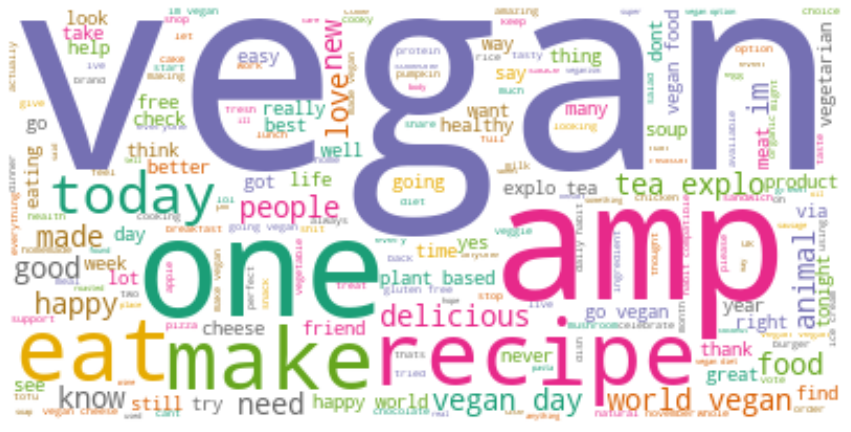

In [19]:
from wordcloud import WordCloud 

# word cloud visualization
allSentences = ' '.join(item for item in clean_newtweet_lemmization)
wordCloud = WordCloud(background_color='white', colormap='Dark2', max_font_size=150, random_state=1).generate(allSentences)
plt.figure(figsize = (15, 20))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()